
### EDA and Preprocessing for BERT
- https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert

In [95]:
import os
import pandas as pd
pd.set_option("display.max_colwidth", 140) # twitterの文字数
pd.set_option("display.max_rows", 500)
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [97]:
input_path = '../data/'

train = pd.read_csv(os.path.join(input_path, 'train.csv'))
train.fillna('', inplace=True)

train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [98]:
train.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [102]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

print(jaccard('Sooo SAD', 'Sooo SAD'))
print(jaccard('Sooo SAD', 'San Diego!!!'))
print(jaccard('Sooo SAD', 'Sooo SAD I will miss you'))
print(jaccard('sooo sad', 'Sooo SAD'))
print(jaccard('Sooo SADD ', 'Sooo SAD'))

1.0
0.0
0.3333333333333333
1.0
0.3333333333333333


In [103]:
train['text_split'] = train.text.str.split()
train['text_len'] = train.text_split.map(len)
train['selected_text_split'] = train.selected_text.str.split()
train['selected_text_len'] = train.selected_text_split.map(len)
train['length_diff'] = train['text_len'] - train['selected_text_len']

train.text_len.max()

33

In [105]:
neutral = train[train.sentiment=='neutral']
positive = train[train.sentiment=='positive']
negative = train[train.sentiment=='negative']

print('neutral: ', len(neutral))
print('positive: ', len(positive))
print('negative: ', len(negative))

neutral:  11118
positive:  8582
negative:  7781


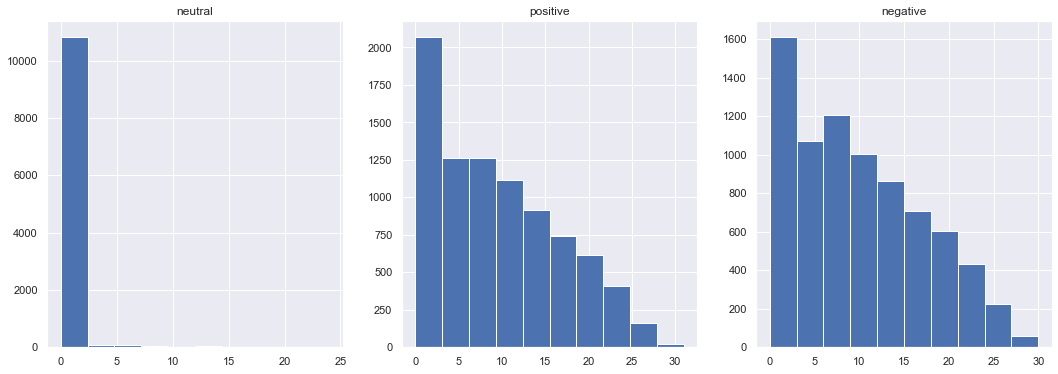

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].set_title("neutral")
ax[0].hist(neutral.length_diff.values)

ax[1].set_title("positive")
ax[1].hist(positive.length_diff.values)

ax[2].set_title("negative")
ax[2].hist(negative.length_diff.values)
plt.show()

In [107]:
sentiments = ['neutral', 'positive', 'negative']
# ここはあまりみないで！！
train['text'] = train['text'].map(lambda x: ' '.join(x.split()))
train['selected_text'] = train['selected_text'].map(lambda x: ' '.join(x.split()))

for sentiment in sentiments:
    df = train[train.sentiment==sentiment]
    print(sentiment, len(df[df.text==df.selected_text]) / len(neutral))

# ここもあまりみないで！！
train = pd.read_csv(os.path.join(input_path, 'train.csv'))
train.fillna('', inplace=True)

neutral 0.8998920669185105
positive 0.10046771001978773
negative 0.10262637164957726


In [108]:
# train[train.text.str.contains('Mother')]
train.iloc[[383, 1070, 1114, 1361, 2133]][['text', 'selected_text']]

,text,selected_text
383,Woo CAVS. Happy Mother`s Day!,Happy
1070,"Happy Mother`s Day to all the mommies out there, be you woman or man as long as you`re `momma` to someone this is your day!",Happy Mother`s Day
1114,goooodnight everyone! and Happy Mothers Day to all the mothers out there.,Happy
1361,Happy Mothers Day!!! <3,Happy Mothers Day!!!
2133,Happy Mothers Day! ..ok..seriously..good night,Happy


In [109]:
train.iloc[[18, 66, 1580]][['text', 'selected_text']]

,text,selected_text
18,is back home now gonna miss every one,onna
66,He`s awesome... Have you worked with him before? He`s a good friend.,s awesome
1580,Just woke up. Gonna have a shower and go to Nan`s for Mother`s day lunch. Happy Mother`s day,Happy Mo


# 単語の分散表現とは
- 単語を数百次元のベクトルに置き換えること(word2vec)
- skip-gramなどが有名？？
- King - Man + Woman = Queen

## 絵で理解するWord2vecの仕組み
- https://qiita.com/Hironsan/items/11b388575a058dc8a46a

# BERTとは
- NLP分野で高い精度を出しているモデル(SQuAD, GLUEなど)
- 今までNLPで実現できていなかった事前学習を可能としている(転移学習、fine tuningが可能に)
- それによって、汎用性の高いモデルになっている
- また事前学習によって、データ不足という課題も解消できるようになっている


## Bidirectional Encoder Representations from Transformersの略です。
名前からも分かる？通り、Transformersをベースとしたモデルです。
## Transformersの特徴
- RNNもCNNも使わないAttentionのみのモデル
- 並列処理が可能となり、学習速度の向上

## Attentionとは
- 簡単に言うと、文中のある単語の意味を理解する時に、文中の単語のどれに注目すれば良いかを表すスコアのこと
- 各単語からクエリ、キーを作成し、クエリと全キーの内積を取り、単語間の関連度を計算する(内積Attention)

### 自然言語処理の巨獣「Transformer」のSelf-Attention Layer紹介
- https://medium.com/lsc-psd/%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E3%81%AE%E5%B7%A8%E7%8D%A3-transformer-%E3%81%AEself-attention-layer%E7%B4%B9%E4%BB%8B-a04dc999efc5

## BERTの事前学習
1. 15%の単語をランダムに隠して、予測する問題解くことで文脈を学習させる。
2. 2つの文章を与え、隣り合っているかの判定を行う

### BERTは事前学習で、文章の穴埋め（＝前後の文脈を加味した埋め込み表現の生成）をする能力と二つのシーケンスが連続したものであるか否か（＝二つのシーケンスの関係性）を判断する能力を得ていることになります。
### 教師なしデータで事前学習を行ったモデルが公開されているため、
### それに転移学習、fine tuningをするだけで特定のタスクを解くことが可能に。

## BERTに入れるデータ
- input_ids: 単語をid化したもの{id: 分散表現}みたいなテーブルがある
- attention_mask: 入力は固定長だが、文章の長さはバラバラ。それを整えるためにある
- token_type_ids: BERTには最大２つの文章を入れられる(文章の長さは任意)。文章の区切りを示すためにこれを使う。

In [110]:
from transformers import BertModel, BertConfig, BertForSequenceClassification, BertJapaneseTokenizer, BertTokenizer

# 使用しているpretrained model
# https://github.com/cl-tohoku/bert-japanese
path = '../data/'
tokenizer = BertJapaneseTokenizer.from_pretrained(os.path.join(path, 'vocab.txt'), word_tokenizer_type='mecab')
tokenizer.encode_plus(text='こんにちは', text_pair=None, max_length=10, pad_to_max_length=True, add_special_tokens=False)

Calling BertJapaneseTokenizer.from_pretrained() with the path to a single file or url is deprecated


{'input_ids': [10350, 25746, 28450, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]}

In [112]:
tokens = tokenizer.tokenize('今関さんは頭がいい')
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

['今', '##関', 'さん', 'は', '頭', 'が', 'いい']
[744, 28656, 2375, 9, 1177, 14, 2575]


In [117]:
tokenizer.encode(text='今関さんは頭がいい', text_pair='そしてお金持ちだ')

[2, 744, 28656, 2375, 9, 1177, 14, 2575, 3, 893, 73, 28296, 75, 3]

In [114]:
tokenizer.convert_ids_to_tokens(2)

'[CLS]'

In [115]:
tokenizer.convert_ids_to_tokens(3)

'[SEP]'

In [90]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [119]:
tokenizer.encode(text='こんにちは')

[2, 10350, 25746, 28450, 3]

In [120]:
tokenizer.encode_plus(text='こんにちは', text_pair='ありがとう', max_length=10, pad_to_max_length=True, add_special_tokens=True)

{'input_ids': [2, 10350, 25746, 28450, 3, 21670, 3, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]}

## 自分が参考にしたカーネル
- https://www.kaggle.com/enzoamp/commented-roberta-training-with-pytorch

question-answering modelの形式

質問文 + [SEP] + 説明文 -> 回答文

※回答文は説明文の中から抜き出す

# magic

In [121]:
train.iloc[[18, 66, 1580]][['text', 'selected_text']]

,text,selected_text
18,is back home now gonna miss every one,onna
66,He`s awesome... Have you worked with him before? He`s a good friend.,s awesome
1580,Just woke up. Gonna have a shower and go to Nan`s for Mother`s day lunch. Happy Mother`s day,Happy Mo


In [ ]:
[Happy,  Mother`s]
[Happy,  M]


In [ ]:
# Happy Mo -> Happy Mother`s day

def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [125]:
print(train.iloc[66].text)# スペースが4つ

  He`s awesome... Have you worked with him before? He`s a good friend.


In [ ]:
# miss
'is back home now      gonna miss every one'
'is back home now gonna miss every one'

## リンク集

### 5th place solution & magic
- https://www.kaggle.com/c/tweet-sentiment-extraction/discussion/159268


### BERT with SentencePiece で日本語専用の pre-trained モデルを学習し、それを基にタスクを解く
- https://techlife.cookpad.com/entry/2018/12/04/093000

### Attention Is All You Need
- https://arxiv.org/abs/1706.03762


### 深層学習界の大前提Transformerの論文解説！
- https://qiita.com/omiita/items/07e69aef6c156d23c538

### 作って理解する Transformer / Attention
- https://qiita.com/halhorn/items/c91497522be27bde17ce